In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('D:\\Project\\NYC_taxi\\nyc_taxi_trip_duration.csv')

In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


# Data preparation

In [6]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [7]:
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_minute'] = df['pickup_datetime'].dt.minute
df['pickup_second'] = df['pickup_datetime'].dt.second

In [8]:
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_minute'] = df['dropoff_datetime'].dt.minute
df['dropoff_second'] = df['dropoff_datetime'].dt.second

In [9]:
modified_df = df.drop(['pickup_datetime','dropoff_datetime','id'],axis=1)

In [10]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_month', 'pickup_day', 'pickup_hour',
       'pickup_minute', 'pickup_second', 'dropoff_month', 'dropoff_day',
       'dropoff_hour', 'dropoff_minute', 'dropoff_second'],
      dtype='object')

In [11]:
modified_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second
0,2,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2,29,16,40,21,2,29,16,47,1
1,1,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,3,11,23,35,37,3,11,23,53,57
2,2,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2,21,17,59,33,2,21,18,26,48
3,2,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,5,9,44,31,1,5,10,3,32
4,1,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,17,6,42,23,2,17,6,56,31


# Data analysis

In [12]:
modified_df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_day,pickup_hour,pickup_minute,pickup_second,dropoff_month,dropoff_day,dropoff_hour,dropoff_minute,dropoff_second
vendor_id,1.000000,0.286463,0.008198,0.002861,0.002371,0.005259,0.027752,-0.005363,0.000450,0.009772,0.000051,0.000399,-0.005336,0.000440,9.702069e-03,1.467373e-04,0.000367
passenger_count,0.286463,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,-0.001481,0.001737,0.009851,-0.000213,0.001634,-0.001497,0.001915,9.214132e-03,-3.043662e-05,0.001177
pickup_longitude,0.008198,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.004037,-0.001378,0.010754,-0.003699,0.001330,0.004090,-0.001531,1.117031e-02,-1.922055e-03,-0.000066
pickup_latitude,0.002861,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.000165,-0.006367,0.011433,0.002841,0.000661,-0.000233,-0.006369,1.806084e-02,7.358288e-04,0.000452
dropoff_longitude,0.002371,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,0.003883,-0.000294,-0.022014,-0.003606,0.000960,0.003923,-0.000378,-2.319344e-02,-2.504689e-03,0.000662
dropoff_latitude,0.005259,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.000580,-0.006082,0.014257,0.002800,-0.000045,-0.000621,-0.006109,1.817302e-02,-5.086402e-04,0.000598
trip_duration,0.027752,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.009378,0.000999,0.002979,-0.004084,0.000429,0.010135,0.001701,3.027398e-03,-5.403933e-03,-0.002833
pickup_month,-0.005363,-0.001481,0.004037,-0.000165,0.003883,-0.000580,0.009378,1.000000,-0.014995,-0.003301,-0.000330,0.000726,0.999937,-0.015091,-4.012763e-03,-1.191919e-03,0.001093
pickup_day,0.000450,0.001737,-0.001378,-0.006367,-0.000294,-0.006082,0.000999,-0.014995,1.000000,-0.001699,-0.001369,-0.000422,-0.014635,0.997913,-1.825372e-03,-1.504521e-03,0.000275
pickup_hour,0.009772,0.009851,0.010754,0.011433,-0.022014,0.014257,0.002979,-0.003301,-0.001699,1.000000,-0.003542,0.001954,-0.003043,-0.001560,9.345907e-01,-2.753289e-03,0.001901


# Observations from Correlation matrix

# 1. No strong correlation found between any other features except for pickup and dropoff longitude
# 2. The pickup longitude and dropoff longitude have higher correlation may be due to they are suggesting the general direction of the passengers taking a taxi. For example: People travelling to office in a common tach park from home in relatively same direction

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

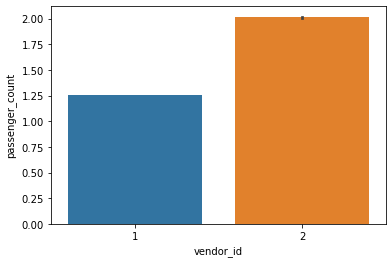

In [13]:
sns.barplot(x=modified_df['vendor_id'],y=modified_df['passenger_count'])

# Number of passengers picked by vendor with vendor id 2 is higher than vendor id 1

<AxesSubplot:xlabel='pickup_month', ylabel='trip_duration'>

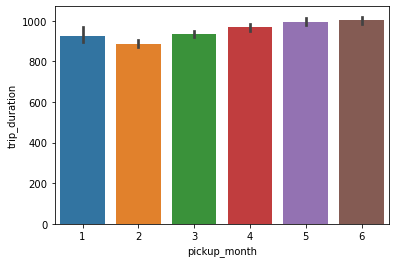

In [14]:
sns.barplot(x=modified_df['pickup_month'],y=modified_df['trip_duration'])

# 1. Month 2 sees the lowest pick up and months 5 and 6 sees higher pickups

<AxesSubplot:xlabel='pickup_day', ylabel='passenger_count'>

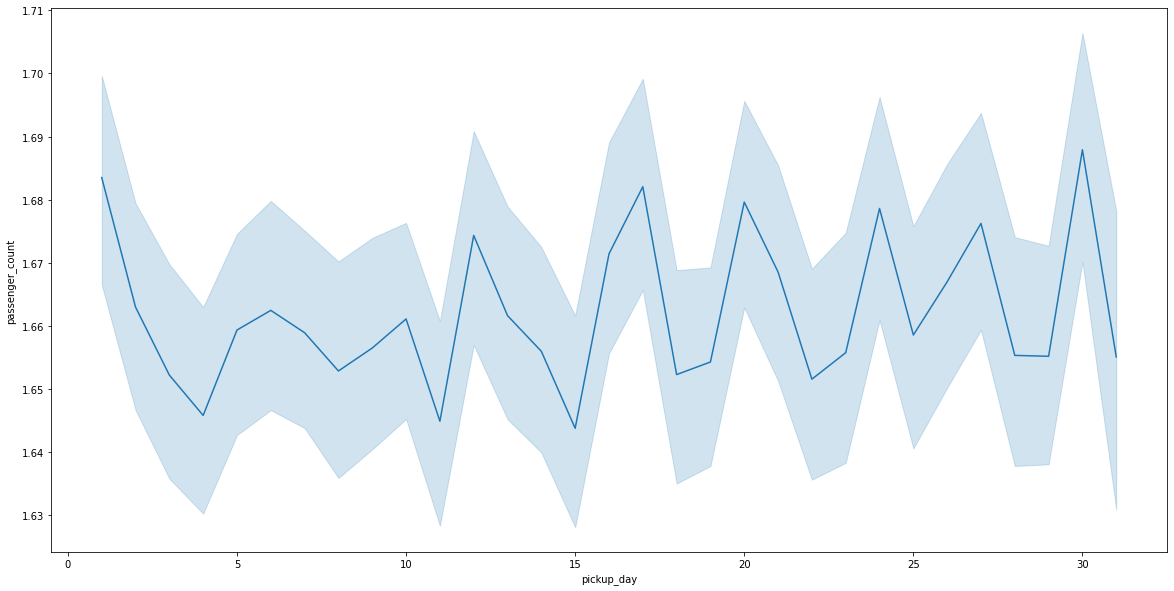

In [15]:
plt.figure(figsize=(20,10))
sns.lineplot(x=modified_df['pickup_day'],y = modified_df['passenger_count'])

# 1. Passenger count is higher at start and end of the month

<AxesSubplot:xlabel='dropoff_longitude', ylabel='passenger_count'>

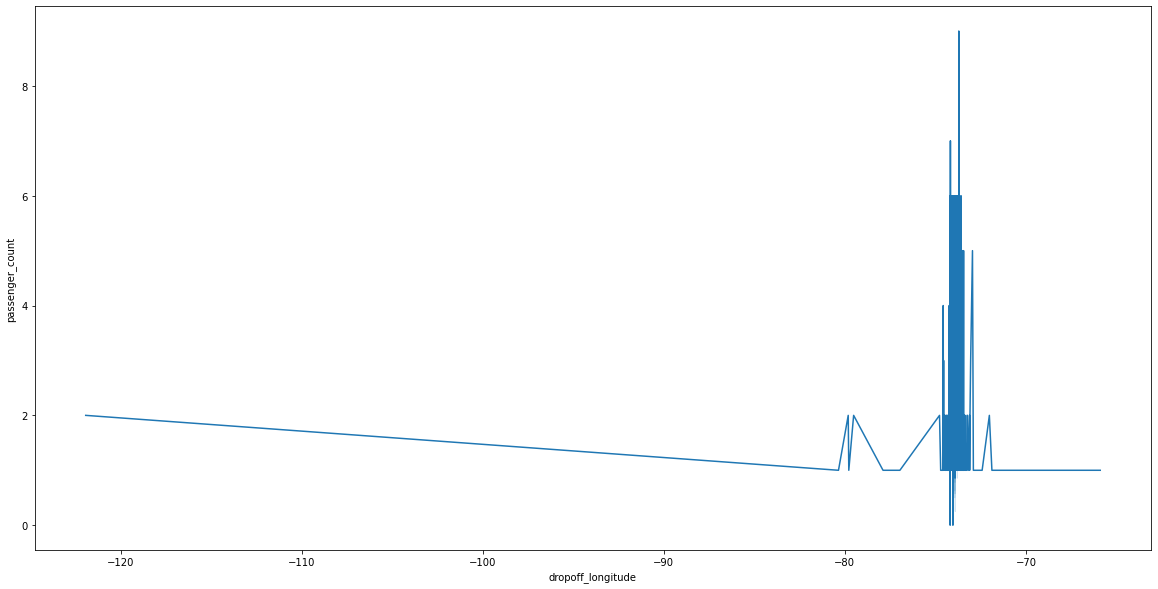

In [16]:
plt.figure(figsize=(20,10))
sns.lineplot(x=modified_df['dropoff_longitude'],y=modified_df['passenger_count'])

# Number of passenger counts opt for dropoff at the longitude between -80 to -70